In [62]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [63]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [64]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfCase = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter=';')
dfCase['Dato'] = pd.to_datetime(dfCase['Dato'])

In [65]:
# Get case data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase2 = pd.read_csv(latestdir+'/Municipality_cases_time_series.csv',delimiter=';')
dfCase2['SampleDate'] = pd.to_datetime(dfCase2['SampleDate'])

In [66]:
# Get test data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfTest = pd.read_csv(latestdir+'/Municipality_tested_persons_time_series.csv',delimiter=';')
dfTest['PrDate_adjusted'] = pd.to_datetime(dfTest['PrDate_adjusted'])
dfTest['Dato'] = pd.to_datetime(dfTest['PrDate_adjusted'])
# dfTest

In [67]:

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
dfKort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',delimiter=';')
# dfKort['Dato'] = pd.to_datetime(dfKort['Dato'])
def getPopCount(komNavn):
    return int(dfKort[dfKort['Kommunenavn'] == komNavn]['Antal borgere'].iloc[0])
# getPopCount('København') - 93000

In [75]:
dateRange = dfTest.Dato 
dfCase.merge(pd.DataFrame({'SampleDate':dateRange}),on='SampleDate')


KeyError: 'SampleDate'

In [54]:
firstDate = np.datetime64('2020-03-16')

dfTest = dfTest[dfTest.Dato >= firstDate]
dfCase2 = dfCase2[dfCase2.SampleDate >= firstDate]
dfCase = dfCase[dfCase.Dato >= firstDate]
# dfTest = dfTest[dfTest.Dato >= firstDate]



dfTest = dfTest[dfTest.Dato <= np.datetime64('2022-02-28')]
dfCase2 = dfCase2[dfCase2.SampleDate <= np.datetime64('2022-02-28')]
dfCase = dfCase[dfCase.Dato <= np.datetime64('2022-02-28')]

In [55]:

curCase = dfCase[dfCase.Kommunenavn == 'København']['Bekræftede tilfælde i alt'].values
curCaseNew = dfCase2['Copenhagen'].values
curTest = dfTest.Copenhagen


curCase = dfCase[dfCase.Kommunenavn == 'Ishøj']['Bekræftede tilfælde i alt'].values
curCaseNew = dfCase2['Ishøj'].values
curTest = dfTest['Ishøj']

curPos = curCase/curTest 
curDates = dfTest.Dato


# curCase = dfCase[dfCase.Kommunenavn == 'København']['Bekræftede tilfælde i alt']
# curCaseNew = dfCase2['Copenhagen'].values[-len(curCase):]
# curTest = dfTest.Copenhagen.values[-len(curCase):]
# curPos = curCase/curTest 
# curDates = dfTest.Dato.values[-len(curCase):]


ValueError: operands could not be broadcast together with shapes (626,) (715,) 

(0.0, 363970.95)

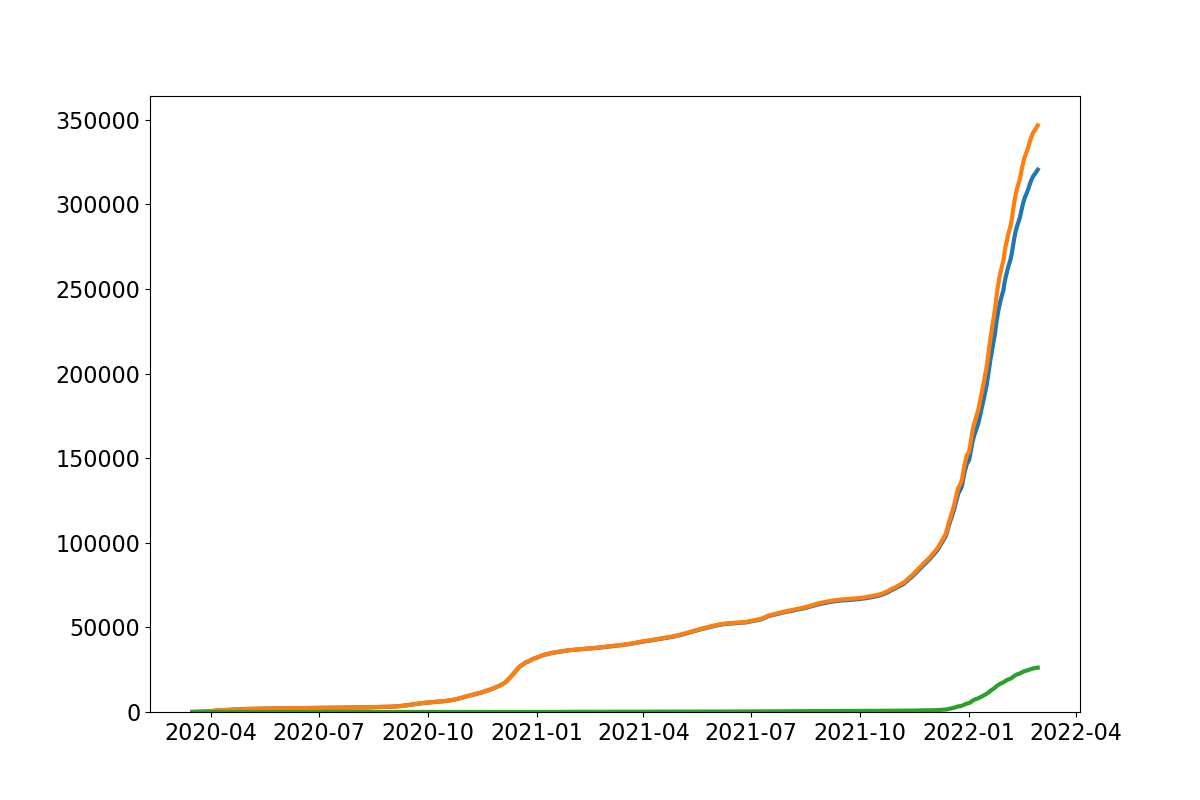

In [ ]:
plt.figure()
reInf = curCase-curCaseNew 
plt.plot(curDates,np.cumsum(curCaseNew))
plt.plot(curDates,np.cumsum(curCase))
plt.plot(curDates,np.cumsum(reInf))

plt.ylim(bottom=0)

In [ ]:
26/93
320/550

26/67
320/((93+550)-67)

0.5555555555555556